# Artificial Intelligence

## 1. Artificial Neural Networks
$\space\space\space\space\space $ A simple Artifical Neural Netwwork (ANN) is built (see Fig 1). 

$\space\space\space\space\space\space v$ is defined by:$\space v = x_1w_1 + x_2w_2 +...+ x_nw_n + b,$ , where $w = weight$, and $b = bias,$

$\space\space\space\space\space\space \sigma(v)$, a transfer function, is known as the sigmoid function: $\space \sigma(v) = \frac{1}{1+e^{-v}},$ 

$\space\space\space\space\space $ and y is the output, defined by: $\space y=\sigma(v).$


In [1]:
# Exampe 1 (Fig.1)
import numpy as np
w1, w2 = 20, 20
b = -30
def sigmoid(v):
    return 1/(1+np.exp(-v))
def AND(x1, x2):
    return sigmoid(x1*w1 + x2*w2 + b)
print("AND(0,0)=", AND(0,0))
print("AND(1,0)=", AND(1,0))
print("AND(0,1)=", AND(0,1))
print("AND(1,1)=", AND(1,1))

AND(0,0)= 9.357622968839299e-14
AND(1,0)= 4.5397868702434395e-05
AND(0,1)= 4.5397868702434395e-05
AND(1,1)= 0.9999546021312976


`Fig.1 Artificial Neural Networks`

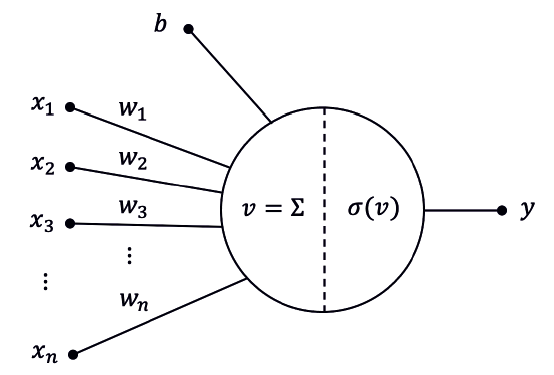

## 2. Forward and Backpropagation Algorithm
Assume a mean squared error, and update the weights in order to minimize the error. 

$\frac{\partial Err}{\partial w_2} = \frac{\partial Err}{\partial y} \frac{\partial y}{\partial w_2} = \frac{\partial Err}{\partial y} \frac{\partial y}{\partial o_1} \frac{\partial o_1}{\partial w_2}, $

$and, \space \frac{\partial Err}{\partial w_2} = (-y_t + y) * \frac{\partial \sigma}{\partial o_1} * \sigma (h_1)$

$and, \space \frac{\partial Err}{\partial w_2} = (-y_t + y) * \sigma(o_1) (1-\sigma(o_1)) * \sigma(h_1)$

The weight $w_2$ is updated, $w_2 = w_2 - \eta * \frac{\partial Err}{\partial w_2}, where \space \eta = the\ learning\ rate$

Similarly, 

$\frac{\partial Err}{\partial w_1} = \frac{\partial Err}{\partial y} \frac{\partial y}{\partial w_1} = \frac{\partial Err}{\partial y} \frac{\partial y}{\partial o_1} \frac{\partial o_1}{\partial \sigma (h_1)} \frac{\partial \sigma (h_1)}{\partial h_1} \frac{\partial h_1}{\partial w_1} $

$and, \space \frac{\partial Err}{\partial w_1} = -(y_t - y) * \sigma (o_1) (1 - \sigma (o_1)) * w_2 * \sigma(h_1)(1-\sigma(h_1))*x_1$

Also, the weight $w_1$ is updated, $w_1 = w_1 - \eta * \frac{\partial Err}{\partial w_1} $

Note: the error, Err, is the function of $y, \sigma, o_i, h_i, and \space w_i, where \space o_i, h_i$ are output and hidden activation potentials, respectively. The basic idea is to minimize Err with respect to the weights $w_1 and \space w_2$. Also, note that the biases $b_1, b_2$ are assuemd to be constant for simplification.

In [2]:
# Example - forward, solve y given weights and biases
import numpy as np
w11, w12, w21, w22, w13, w23 = 0.2, 0.15, 0.25, 0.3, 0.15, 0.1
b1, b2, b3 = -1, -1, -1
x1, x2 = 1, 1

def sigmoid(v):
    return 1/(1 + np.exp(-v))
h1 = x1 * w11 + x2 * w21 + b1
h2 = x1 * w12 + x2 * w22 + b2
o1 = sigmoid(h1) * w13 + sigmoid(h2) * w23 + b3
y = sigmoid(o1)
print("y=",y)

# Example - backpropagation, determine the weights using a mean square error
yt, eta = 0, 0.1
dErrdw13 = -(yt-y)* sigmoid(o1)*(1-sigmoid(o1))*sigmoid(h1)
w13 = w13 - eta * dErrdw13
print("w13=", w13)

dErrdw23 = -(yt-y)*sigmoid(o1)*(1-sigmoid(o1))*sigmoid(h2)
w23 = w23 - eta * dErrdw23
print("w23=", w23)

y= 0.28729994077761756
w13= 0.1478477236598976
w23= 0.09784772365989759


`Fig.2`

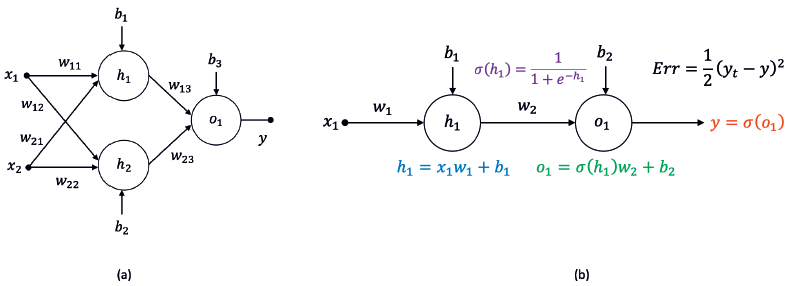





## 3. Try Proving it Mathmatically

$\space\space\space\space\space\space\space$ Given the function: $\sigma(v) = \frac{1}{1+e^{-v}}$, prove that: $\frac{d\sigma}{dv}= \sigma(v)(1-\sigma(v))$

In [3]:
from sympy import *
v = symbols("v")
sigmoid = 1/(1+exp(-v))
dsigmoid = diff(sigmoid, v)
simplify(dsigmoid - sigmoid*(1-sigmoid))

0

## 4. Hyperparameter - The Learning Rate

Change the learning rate to see how the convergence is affected. 